In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

The objective of this analysis is to explore and understand customer purchasing behavior during the Diwali sale. By analyzing sales data, we aim to identify key trends such as popular product categories and customer demographics. This will help businesses optimize marketing strategies, improve inventory management, and enhance customer engagement for future sales events.

In [3]:
df= pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")
#to avoid encoding error ,use unicode_escape

In [4]:
df.shape


(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop unrelated/blank columns ..from  the above info we can see that last 2 column does not have any values thats why we are dropping them
df.drop(["Status",'unnamed1'],axis=1,inplace=True)

In [8]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum()
#check for null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.shape

(11251, 13)

In [11]:
#drop null values
df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

we can see that  the number of rows are 11239 and in the starting it is 11251 which means null values are deleted (number of rows from amount)

In [13]:
#change data type
df['Amount']=df['Amount'].astype("int")

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**Exploratory data analysis**

Gender

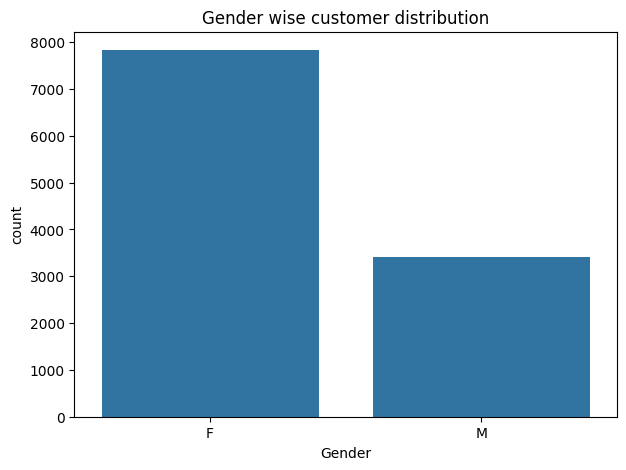

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',data=df)
plt.title("Gender wise customer distribution")
plt.xlabel("Gender",fontsize=10)
plt.ylabel("count",fontsize=10)
plt.show()



female customers are more as compared to male customers during diwali sales

In [18]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)


,Gender,Amount
0,F,74335853
1,M,31913276


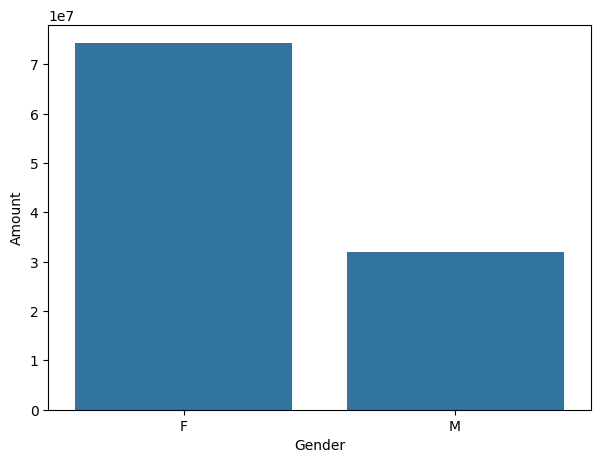

In [19]:
plt.figure(figsize=(7,5))
sales_gender =df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender', y='Amount',data=sales_gender)
plt.xlabel("Gender",fontsize=10)
plt.ylabel("Amount",fontsize=10)
plt.show()

#from the graphs we can see that the most of the buyers are female and even the punchasing power of female are greater than men

**Age**

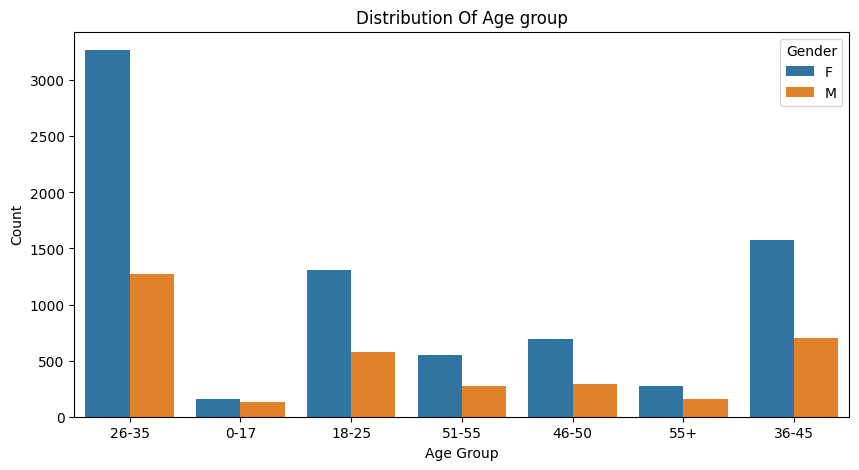

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Age Group",hue='Gender')
plt.xlabel("Age Group",fontsize=10)
plt.ylabel("Count",fontsize=10) 
plt.title("Distribution Of Age group")
plt.show()

In [21]:
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


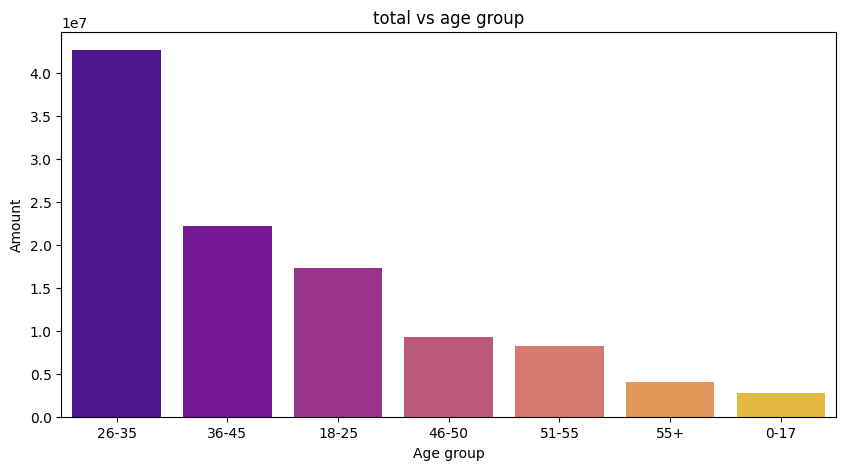

In [22]:
plt.figure(figsize=(10,5))
sales_age =df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age,palette='plasma')
plt.title("total vs age group")
plt.xlabel("Age group",fontsize=(10))
plt.ylabel("Amount",fontsize=(10))
plt.show()

from the above graph we can see that most of the buyers are of age group between 26-35 years females

**State**

In [23]:
#total number of orders from top 10 states
sales_state = df.groupby(["State"],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


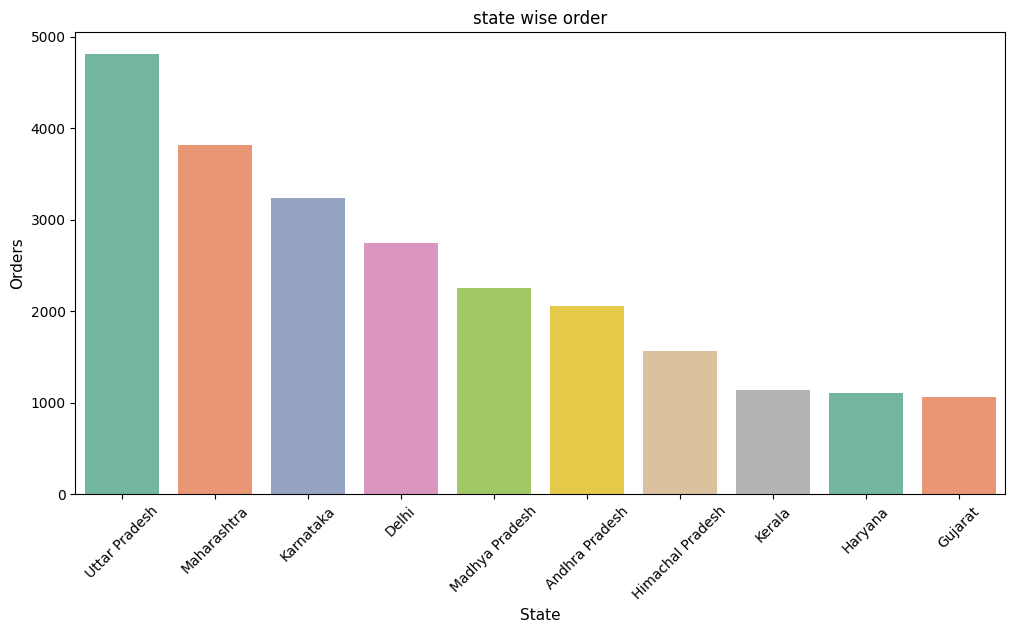

In [24]:
#total amount of ordes from top 10 state
plt.figure(figsize=(12,6))           #width=12,hight6
sns.barplot(data=sales_state,x="State",y='Orders',palette="Set2")
plt.title('state wise order')
plt.xlabel('State',fontsize=11)
plt.ylabel('Orders',fontsize=11)
plt.xticks(rotation=45)
plt.show()

In [25]:
#total no of amounts/sales from 10 state
sales_state = df.groupby(["State"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


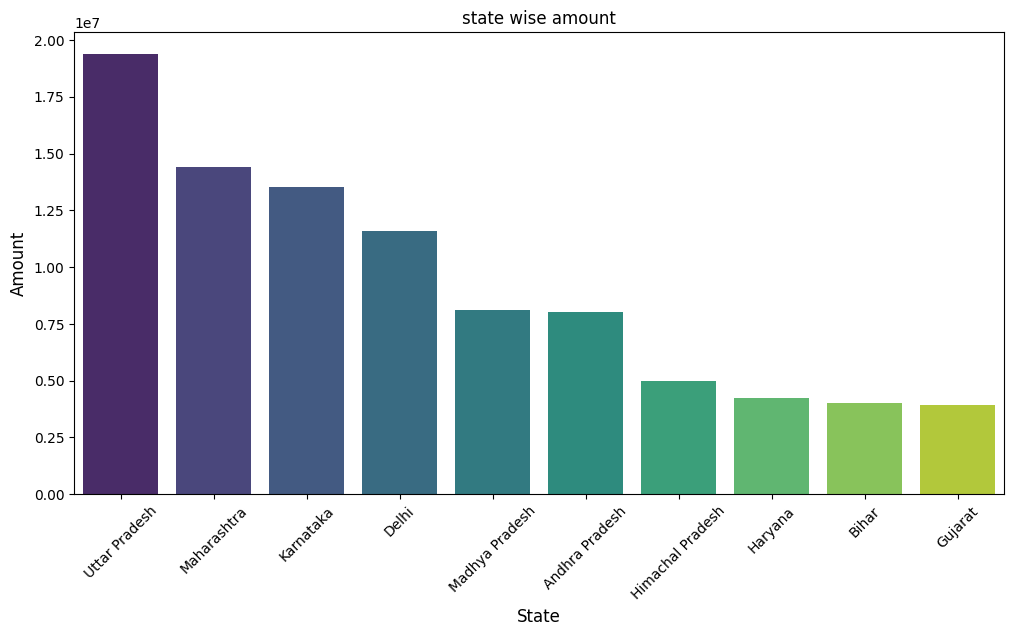

In [26]:
plt.figure(figsize=(12,6))           #width=12,hight6
sns.barplot(data=sales_state,x="State",y='Amount',palette='viridis')
plt.title('state wise amount')
plt.xlabel('State',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.xticks(rotation=45)
plt.show()

from the above graph we can see that  most of the orders  and amount/sales are from uttar pradesh, maharashtra and karnataka respectively.

**Marital status**

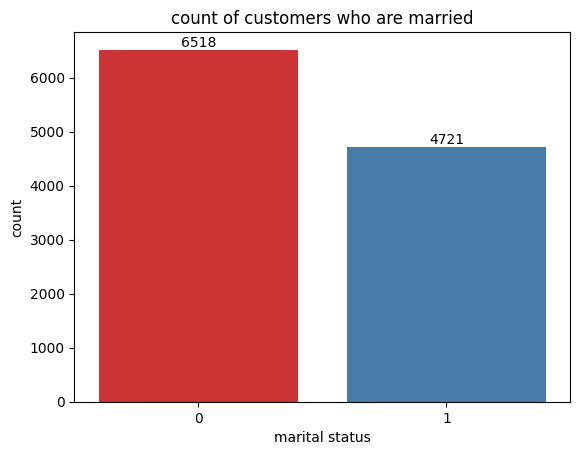

In [27]:
ax = sns.countplot(data=df,x="Marital_Status",palette="Set1")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("count of customers who are married")
plt.xlabel("marital status")
plt.ylabel("count")
plt.show()

In [28]:
sales_state= df.groupby(["Marital_Status","Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_state

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


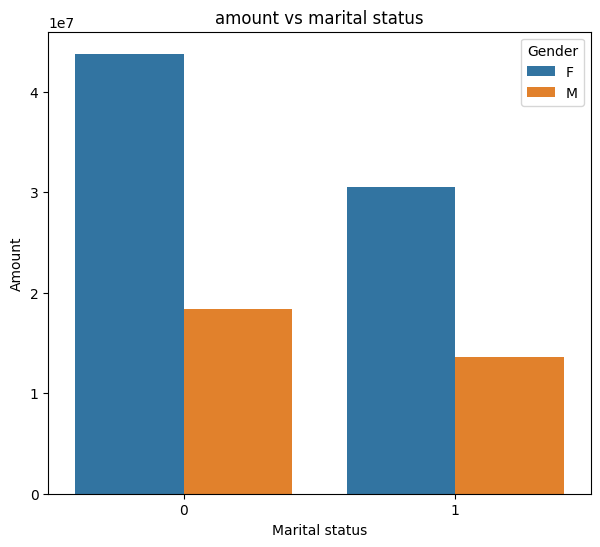

In [29]:
plt.figure(figsize=(7,6))           
sns.barplot(data=sales_state,x="Marital_Status",y='Amount',hue="Gender")
plt.title("amount vs marital status")
plt.xlabel('Marital status',fontsize=10)
plt.ylabel('Amount',fontsize=10)
plt.show()

from the above graph we can see thet the most of the buyers are married (women) and they have high purchasing power

**occupation**

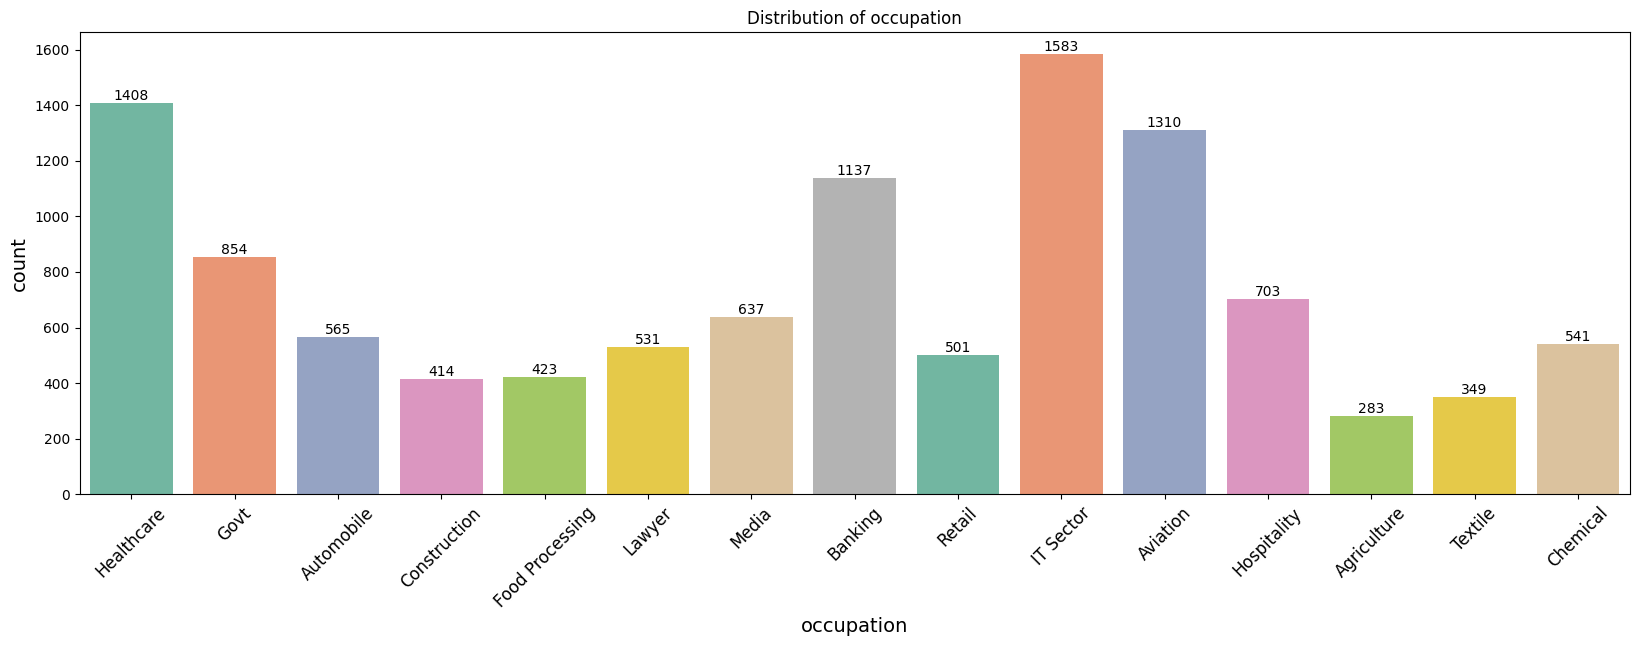

In [30]:
plt.figure(figsize=(20,6))
ax=sns.countplot(data=df,x='Occupation',palette="Set2")

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of occupation")
plt.xlabel('occupation',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xticks(fontsize = 12,rotation=45)
plt.show()

In [31]:
sales_state= df.groupby(["Occupation"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_state

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


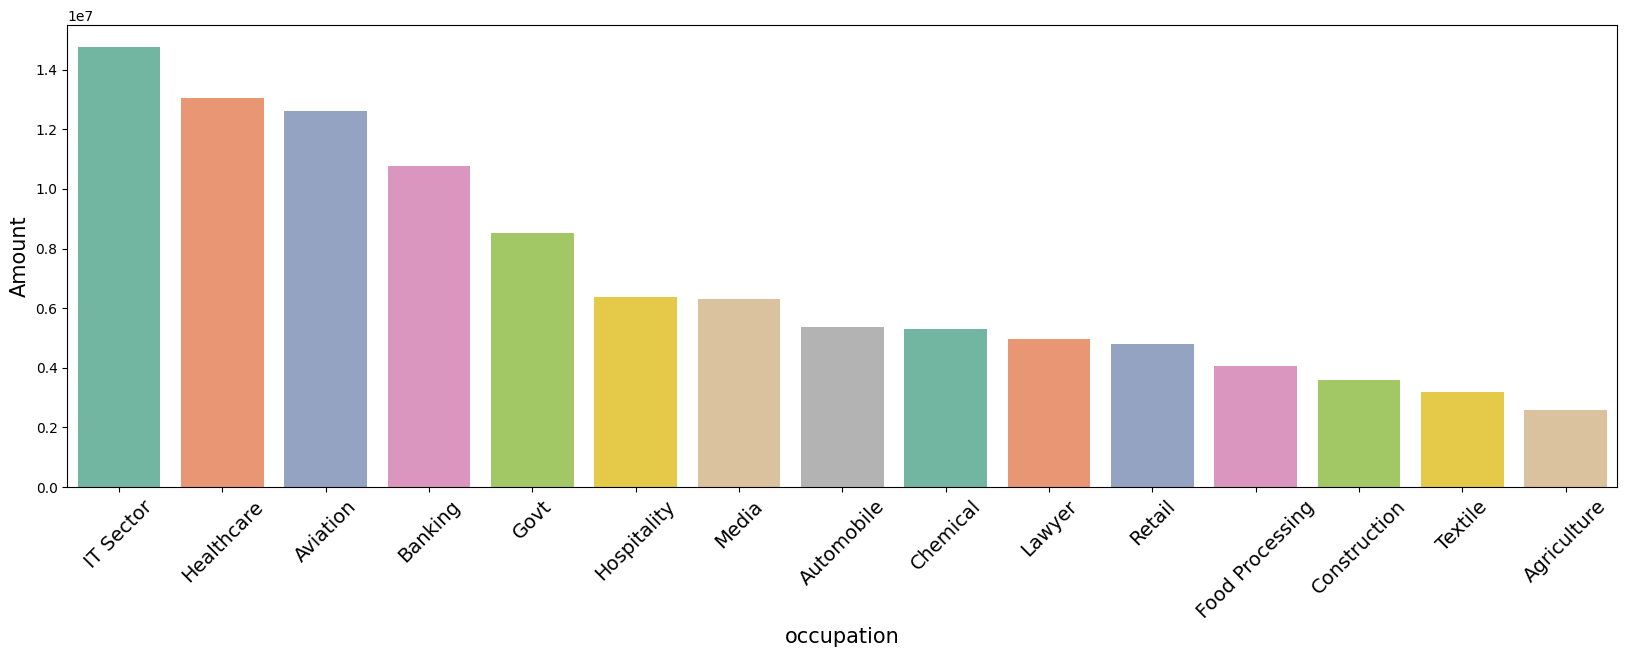

In [32]:

plt.figure(figsize=(20,6))           #width=12,hight6
sns.barplot(data=sales_state,x="Occupation",y='Amount',palette="Set2")
plt.xlabel('occupation',fontsize =15)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Amount',fontsize=15)
plt.show()

from the above graph we can see that the most of the buyers are working in IT ,healthcare , aviation sector

Product_Category

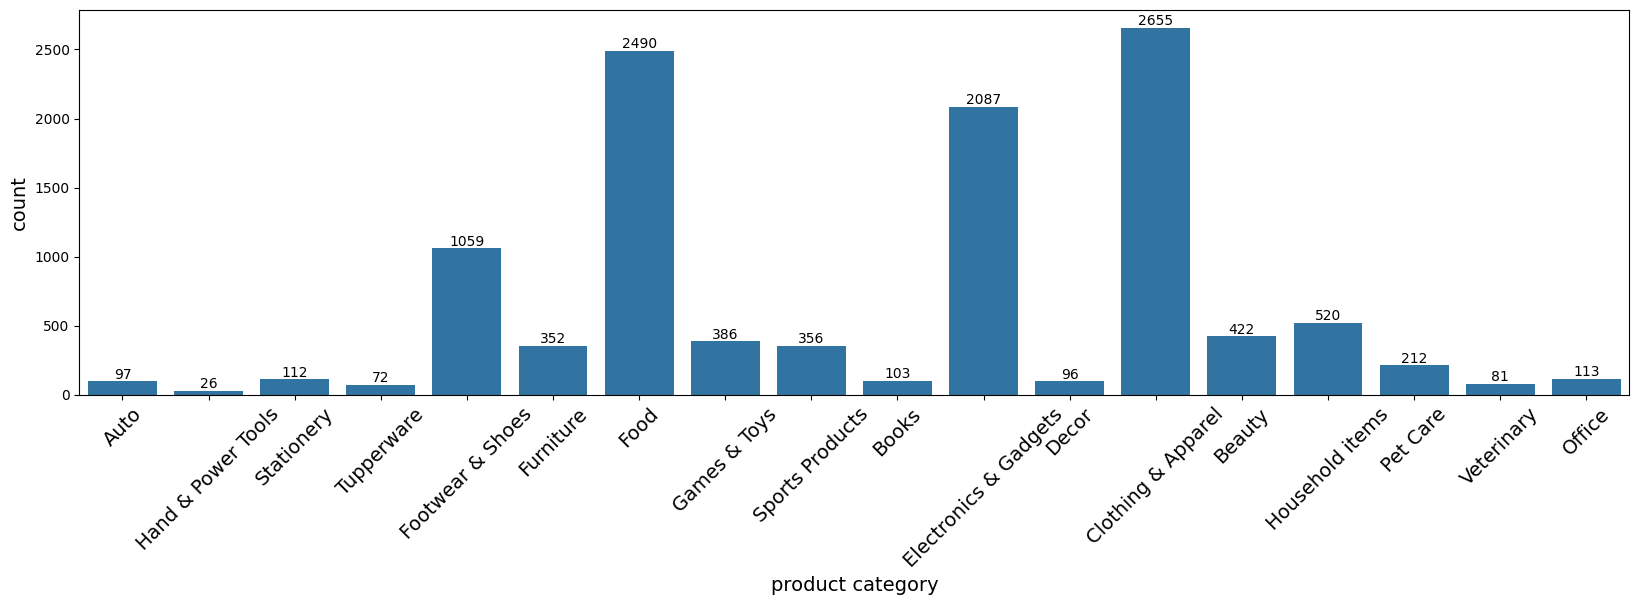

In [33]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45,fontsize=14)
plt.xlabel("product category",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.show()


In [34]:
sales_state= df.groupby(["Product_Category"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_state

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


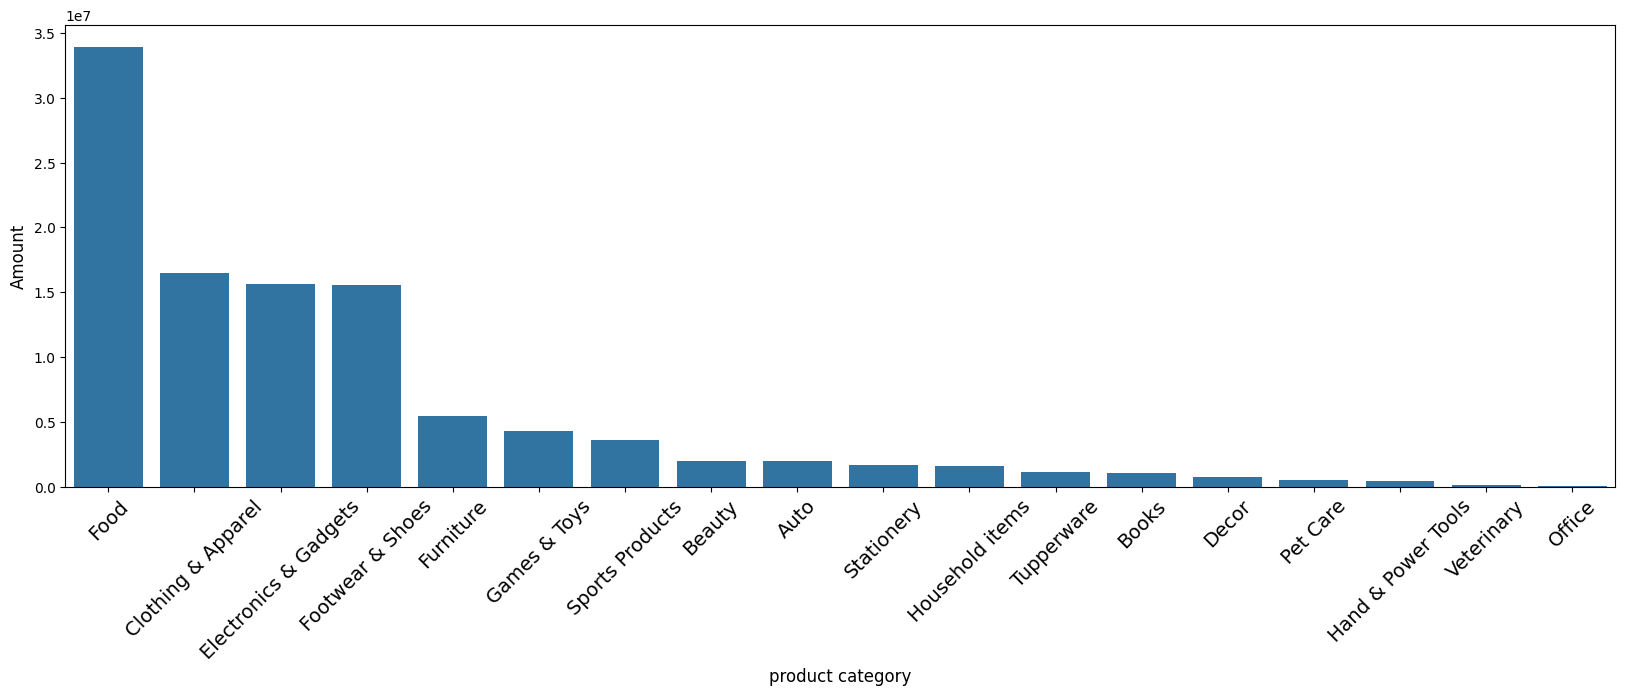

In [35]:
plt.figure(figsize=(20,6))           #width=12,hight6
sns.barplot(data=sales_state,x="Product_Category",y='Amount')
plt.xlabel('product category',fontsize=12)
plt.ylabel('Amount',fontsize=12)
plt.xticks(rotation=45,fontsize=14)
plt.show()

from the above graph we can see that the most of the sold product are from food ,clothing and electronics category

**Conclusion**

Married women age group 26-35 years from up,maharashtra and karnataka working in IT ,healthcare and aviation are more likely to bue products from food 
clothing and elctronics category

**Preprocessing**

In [38]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
encoded_data = encoder.fit_transform(df[['State']])

# Create a DataFrame for the encoded data
df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['State']))

# Concatenate original and encoded data
result = pd.concat([df, df2], axis=1)

(result)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,...,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Telangana,State_Uttar Pradesh,State_Uttarakhand
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
encoded_data = encoder.fit_transform(df[['Gender']])

# Create a DataFrame for the encoded data
df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender']))

# Concatenate original and encoded data
result = pd.concat([df, df2], axis=1)

(result)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Gender_F,Gender_M
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,Auto,1.0,23952.0,1.0,0.0
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,Auto,3.0,23934.0,1.0,0.0
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,Auto,3.0,23924.0,1.0,0.0
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,Auto,2.0,23912.0,0.0,1.0
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,Auto,2.0,23877.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [40]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
encoded_data = encoder.fit_transform(df[['State']])

# Create a DataFrame for the encoded data
df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['State']))

# Concatenate original and encoded data
result = pd.concat([df, df2], axis=1)

(result)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,...,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Telangana,State_Uttar Pradesh,State_Uttarakhand
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform data
encoded_data = encoder.fit_transform(df[['Occupation']])

# Create a DataFrame for the encoded data
df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Occupation']))

# Concatenate original and encoded data
result = pd.concat([df, df2], axis=1)

(result)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,...,Occupation_Construction,Occupation_Food Processing,Occupation_Govt,Occupation_Healthcare,Occupation_Hospitality,Occupation_IT Sector,Occupation_Lawyer,Occupation_Media,Occupation_Retail,Occupation_Textile
0,1002903.0,Sanskriti,P00125942,F,26-35,28.0,0.0,Maharashtra,Western,Healthcare,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000732.0,Kartik,P00110942,F,26-35,35.0,1.0,Andhra Pradesh,Southern,Govt,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,Uttar Pradesh,Central,Automobile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1001425.0,Sudevi,P00237842,M,0-17,16.0,0.0,Karnataka,Southern,Construction,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Gujarat,Western,Food Processing,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
